In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Read the data

In [2]:
import pathlib
train_data_dir = pathlib.Path("./Train")
test_data_dir = pathlib.Path("./Test")


### Train data dir


In [3]:
train_count = len(list(train_data_dir.glob('*/*.jpg')))
print(train_count)

2239


### Test data dir

In [4]:
test_count = len(list(test_data_dir.glob('*/*.jpg')))
print(test_count)

118


In [5]:
batch_size = 32
image_height = 180
image_width = 180
   

### Train dataset

In [6]:
train_data = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=40,
    validation_split = 0.2,
    subset='training',
    image_size=(image_height, image_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Validation dataset

In [7]:
validation_data = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=40,
    validation_split = 0.2,
    subset='validation',
    image_size=(image_height, image_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
class_type = validation_data.class_names
print(class_type)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Data visualization

In [9]:
def visualize_images(data,class_type):
    plt.figure(figsize=(12, 12))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_type[i])
            plt.axis("off")

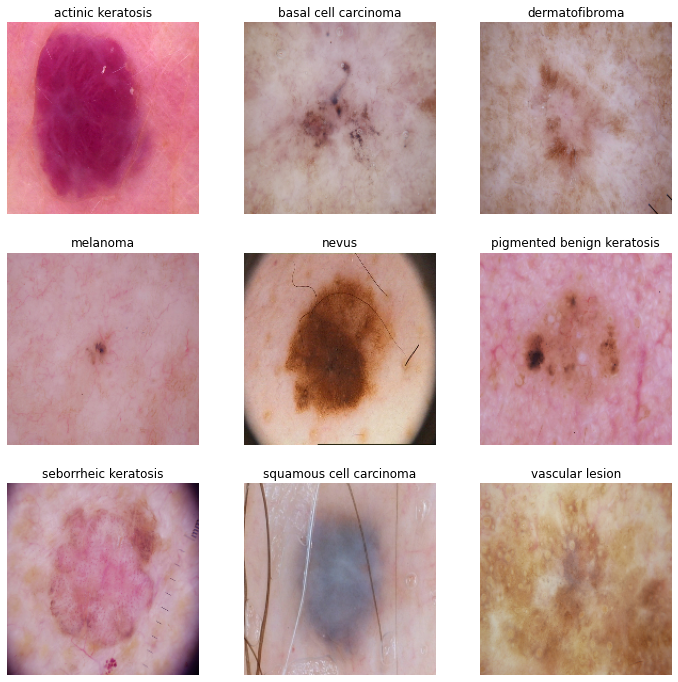

In [10]:
visualize_images(train_data,class_type)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1


#### Basic model without dropout layers and batch normalization

In [12]:
# Funtion for architecture of model 1
def build_model1(image_height, image_width):
  model = Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)))
  model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(9,activation='softmax'))
  return model

In [13]:
model1= build_model1(image_height,image_width)

In [14]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
epochs = 20
history1 = model1.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20


c:\Users\Asus\.conda\envs\drugenv\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 18s 259ms/step - loss: 2.0221 - accuracy: 0.2422 - val_loss: 1.8355 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 14s 246ms/step - loss: 1.6895 - accuracy: 0.3945 - val_loss: 1.6022 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 14s 247ms/step - loss: 1.4509 - accuracy: 0.5028 - val_loss: 1.4775 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 14s 245ms/step - loss: 1.3543 - accuracy: 0.5307 - val_loss: 1.5383 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 14s 251ms/step - loss: 1.2407 - accuracy: 0.5686 - val_loss: 1.3447 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 14s 246ms/step - loss: 1.1097 - accuracy: 0.6155 - val_loss: 1.4239 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 14s 251ms/step - loss: 1.0739 - accuracy: 0.6166 - val_loss: 1.3320 - val_accuracy: 0.5481
Epoch 8/20

## Visualization of accuracy for model 1

In [17]:
def acc_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(epochs)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

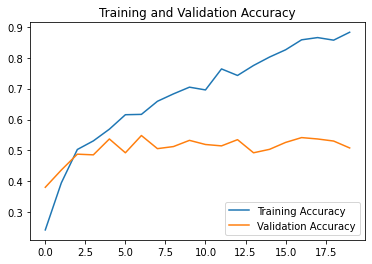

In [18]:
acc_plot(history1)

## Visualization of Loss for model 1

In [19]:
def loss_plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

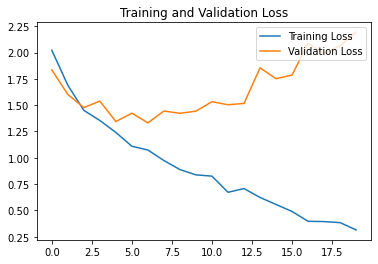

In [20]:
loss_plot(history1)

In [21]:
loss, accuracy = model1.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model1.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 52ms/step - loss: 2.1934 - accuracy: 0.5078
Train Accuracy:  0.9140625
Validation Accuracy:  0.5078299641609192
Train Loss:  0.2311759740114212
Validation Loss 2.1933679580688477


## Based on accuracy metric we find that train accuracy is very high compare to the validation accuracy. It shows overfitting of the data

# Data augmentation

In [22]:
data_augmentation = Sequential()
data_augmentation.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_augmentation.add(layers.experimental.preprocessing.RandomZoom(0.1))

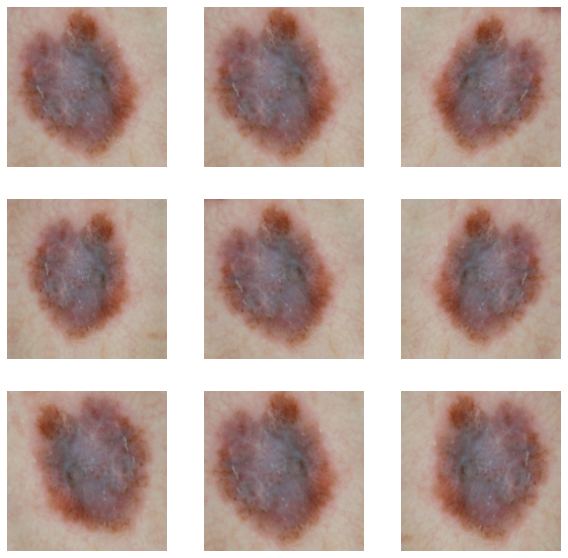

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Model 2

In [24]:
# Funtion for architecture of model 2
def build_model2(data_aug):
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1./255))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    
    return model

In [25]:
model2 = build_model2(data_augmentation)

In [26]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [28]:
history2 = model2.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 304ms/step - loss: 2.0445 - accuracy: 0.1936 - val_loss: 2.0589 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 17s 309ms/step - loss: 1.9102 - accuracy: 0.2868 - val_loss: 2.0234 - val_accuracy: 0.2908
Epoch 3/20
56/56 [==============================] - 17s 309ms/step - loss: 1.6554 - accuracy: 0.4079 - val_loss: 1.6265 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 18s 317ms/step - loss: 1.4737 - accuracy: 0.4782 - val_loss: 1.4907 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 18s 315ms/step - loss: 1.3968 - accuracy: 0.5089 - val_loss: 1.4148 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 17s 312ms/step - loss: 1.3975 - accuracy: 0.4989 - val_loss: 1.4433 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 17s 313ms/step - loss: 1.3479 - accuracy: 0.5268 - val_loss: 1.4103 - val_accuracy: 0.5078

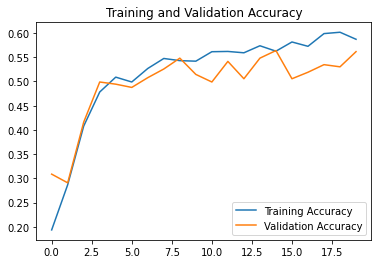

In [29]:
acc_plot(history2)

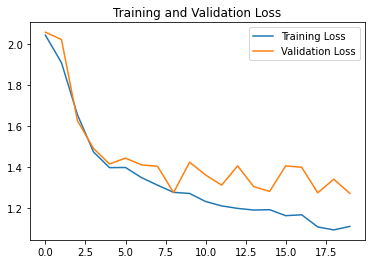

In [30]:
loss_plot(history2)

In [75]:
loss, accuracy = model2.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model2.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 55ms/step - loss: 1.2710 - accuracy: 0.5615
Train Accuracy:  0.6222098469734192
Validation Accuracy:  0.5615212321281433
Train Loss:  0.9948585629463196
Validation Loss 1.2709729671478271


## On comparision with model 1 model 2 performs better. The difference between train and validation accuracy also reduced as we used dropout layers to regularise the model

# Model 3

#### Used model 2 architecture butt increased the number of epochs

In [33]:
model3 = build_model2(data_augmentation)

In [34]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [36]:
epochs = 30
history3 = model3.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 18s 313ms/step - loss: 1.8736 - accuracy: 0.3019 - val_loss: 1.7209 - val_accuracy: 0.3535
Epoch 2/30
56/56 [==============================] - 17s 307ms/step - loss: 1.6014 - accuracy: 0.4297 - val_loss: 1.5668 - val_accuracy: 0.4609
Epoch 3/30
56/56 [==============================] - 17s 309ms/step - loss: 1.4916 - accuracy: 0.4894 - val_loss: 1.5623 - val_accuracy: 0.4519
Epoch 4/30
56/56 [==============================] - 18s 313ms/step - loss: 1.4370 - accuracy: 0.4955 - val_loss: 1.4962 - val_accuracy: 0.4676
Epoch 5/30
56/56 [==============================] - 17s 309ms/step - loss: 1.4081 - accuracy: 0.5039 - val_loss: 1.3639 - val_accuracy: 0.5324
Epoch 6/30
56/56 [==============================] - 17s 312ms/step - loss: 1.3894 - accuracy: 0.5022 - val_loss: 1.4990 - val_accuracy: 0.4877
Epoch 7/30
56/56 [==============================] - 17s 312ms/step - loss: 1.3748 - accuracy: 0.5307 - val_loss: 1.4042 - val_accuracy: 0.5280

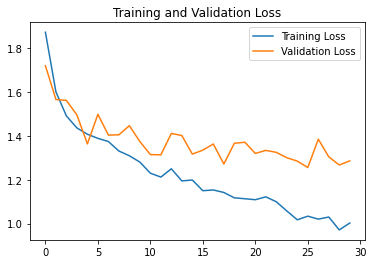

In [38]:
loss_plot(history3)

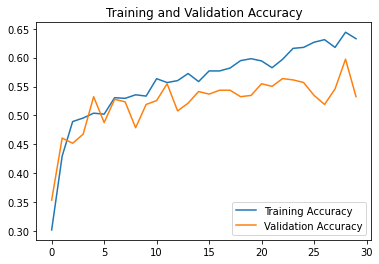

In [39]:
acc_plot(history3)

In [40]:
loss, accuracy = model3.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model3.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 54ms/step - loss: 1.2865 - accuracy: 0.5324
Train Accuracy:  0.6489955186843872
Validation Accuracy:  0.5324384570121765
Train Loss:  0.9593523740768433
Validation Loss 1.286547064781189


## By increasing the epochs the difference between train and validation accyuracy getting increased. This shows that it tends to get overfit the data

# Model 4

#### In model 4 added extra dropout layers

In [41]:
def build_model4(data_aug):
    model = Sequential()
    model.add(data_augmentation)
    model.add(layers.experimental.preprocessing.Rescaling(1./255))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    return model

In [42]:
model4= build_model4(data_augmentation)

In [43]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

In [45]:
epochs = 20
history4 = model4.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 55s 983ms/step - loss: 2.0434 - accuracy: 0.1964 - val_loss: 2.0970 - val_accuracy: 0.2304
Epoch 2/20
56/56 [==============================] - 83s 1s/step - loss: 2.0096 - accuracy: 0.1964 - val_loss: 2.0914 - val_accuracy: 0.1767
Epoch 3/20
56/56 [==============================] - 61s 1s/step - loss: 1.9361 - accuracy: 0.2718 - val_loss: 1.9760 - val_accuracy: 0.2013
Epoch 4/20
56/56 [==============================] - 19s 335ms/step - loss: 1.8076 - accuracy: 0.3421 - val_loss: 2.0028 - val_accuracy: 0.2685
Epoch 5/20
56/56 [==============================] - 19s 334ms/step - loss: 1.7281 - accuracy: 0.3856 - val_loss: 1.7696 - val_accuracy: 0.3557
Epoch 6/20
56/56 [==============================] - 19s 336ms/step - loss: 1.6590 - accuracy: 0.4141 - val_loss: 1.7721 - val_accuracy: 0.3647
Epoch 7/20
56/56 [==============================] - 73s 1s/step - loss: 1.5555 - accuracy: 0.4632 - val_loss: 1.6507 - val_accuracy: 0.4004
Epoch 8/

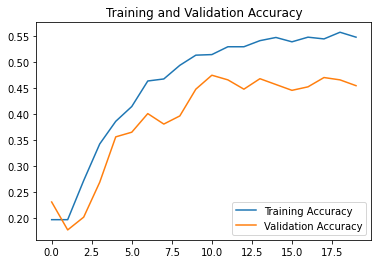

In [46]:
acc_plot(history4)

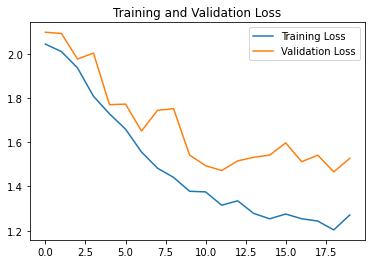

In [47]:
loss_plot(history4)

In [48]:
loss, accuracy = model4.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model4.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 56ms/step - loss: 1.5272 - accuracy: 0.4541
Train Accuracy:  0.4810267984867096
Validation Accuracy:  0.45413869619369507
Train Loss:  1.3681375980377197
Validation Loss 1.527153730392456


## Model 4 performs good as difference between train and validation accuracy is very less. 

In [92]:
## Your code goes here.
class_names=[]
count =[]
for i in class_type:
    sample_count = len(list(train_data_dir.glob(i + '/*.jpg')))
    class_names.append(i)
    count.append(sample_count)
    print(str(i) + " : " + str(sample_count) )

actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


# Class Distribution

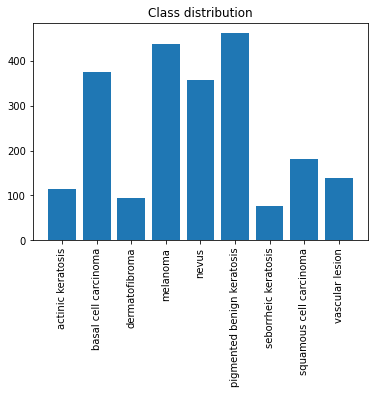

In [97]:
plt.bar(class_names,count)
plt.xticks(rotation=90)
plt.title("Class distribution")
plt.show()


# Handling inbalance data

#### Making 500 as the size of each classes

In [51]:
path_to_training_dataset=str(train_data_dir) + '/'
import Augmentor
for i in class_type:
    data = Augmentor.Pipeline(path_to_training_dataset + i)
    data.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    data.sample(500)

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134F6CFEB80>: 100%|██████████| 500/500 [00:01<00:00, 308.15 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134B6979BB0>: 100%|██████████| 500/500 [00:01<00:00, 285.14 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134B7D086A0>: 100%|██████████| 500/500 [00:01<00:00, 322.26 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x134D885C070>: 100%|██████████| 500/500 [00:06<00:00, 72.95 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134B8528EE0>: 100%|██████████| 500/500 [00:18<00:00, 27.77 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134BA0C4430>: 100%|██████████| 500/500 [00:09<00:00, 52.23 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x134B995A910>: 100%|██████████| 500/500 [00:21<00:00, 23.27 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134B8361AF0>: 100%|██████████| 500/500 [00:09<00:00, 54.05 Samples/s]                   


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x134B7E5C6D0>: 100%|██████████| 500/500 [00:08<00:00, 55.93 Samples/s]                   


In [58]:
image_count_train = len(list(train_data_dir.glob('*/output/*.jpg')))
print(image_count_train)

4500


# New train directory

In [73]:
new_train_dir=train_data_dir
new_train_data = tf.keras.preprocessing.image_dataset_from_directory(
  new_train_dir,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [74]:
new_validation_data = tf.keras.preprocessing.image_dataset_from_directory(
  new_train_dir,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Model 5

## Same architecture as model 2 but with new balanced dataset

In [76]:
model5 = build_model2(data_augmentation)

In [77]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [79]:
history5 = model5.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20


c:\Users\Asus\.conda\envs\drugenv\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 18s 310ms/step - loss: 2.0198 - accuracy: 0.2221 - val_loss: 2.0182 - val_accuracy: 0.2841
Epoch 2/20
56/56 [==============================] - 18s 318ms/step - loss: 1.7638 - accuracy: 0.3544 - val_loss: 1.8617 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 17s 311ms/step - loss: 1.6201 - accuracy: 0.4263 - val_loss: 1.6438 - val_accuracy: 0.3937
Epoch 4/20
56/56 [==============================] - 18s 313ms/step - loss: 1.5035 - accuracy: 0.4704 - val_loss: 1.5341 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 18s 316ms/step - loss: 1.4660 - accuracy: 0.4849 - val_loss: 1.4190 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 17s 310ms/step - loss: 1.4190 - accuracy: 0.5011 - val_loss: 1.4453 - val_accuracy: 0.4899
Epoch 7/20
56/56 [==============================] - 17s 312ms/step - loss: 1.3514 - accuracy: 0.5262 - val_loss: 1.3992 - val_accuracy: 0.5190
Epoch 8/20

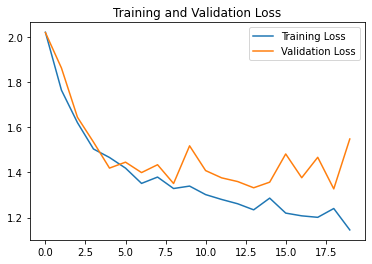

In [86]:
loss_plot(history5)

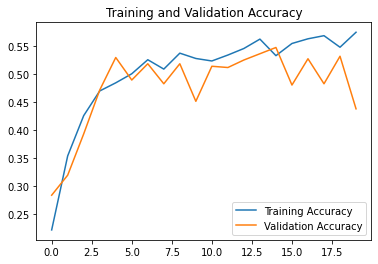

In [87]:
acc_plot(history5)

In [90]:
loss, accuracy = model5.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model5.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 55ms/step - loss: 1.5478 - accuracy: 0.4385
Train Accuracy:  0.5122767686843872
Validation Accuracy:  0.4384787380695343
Train Loss:  1.2920767068862915
Validation Loss 1.547763705253601


## It doesn't show much improvement based on accuracy


# Model 6

#### Added Batch normalization to see the performance

In [98]:
def build_model6(image_height, image_width):
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)))
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    return model

In [99]:
model6 = build_model6(image_height,image_width)

In [100]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 45, 64)       

In [102]:
history6 = model6.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/20


c:\Users\Asus\.conda\envs\drugenv\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 17s 283ms/step - loss: 2.2739 - accuracy: 0.3750 - val_loss: 3.0021 - val_accuracy: 0.0515
Epoch 2/20
56/56 [==============================] - 16s 284ms/step - loss: 1.4576 - accuracy: 0.5073 - val_loss: 3.7448 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 16s 285ms/step - loss: 1.3293 - accuracy: 0.5307 - val_loss: 5.6121 - val_accuracy: 0.0582
Epoch 4/20
56/56 [==============================] - 16s 282ms/step - loss: 1.2281 - accuracy: 0.5681 - val_loss: 4.3558 - val_accuracy: 0.1700
Epoch 5/20
56/56 [==============================] - 17s 296ms/step - loss: 1.1610 - accuracy: 0.5871 - val_loss: 4.5894 - val_accuracy: 0.1834
Epoch 6/20
56/56 [==============================] - 16s 284ms/step - loss: 1.0698 - accuracy: 0.6071 - val_loss: 4.5492 - val_accuracy: 0.1521
Epoch 7/20
56/56 [==============================] - 17s 296ms/step - loss: 1.0221 - accuracy: 0.6211 - val_loss: 4.6199 - val_accuracy: 0.2192
Epoch 8/20

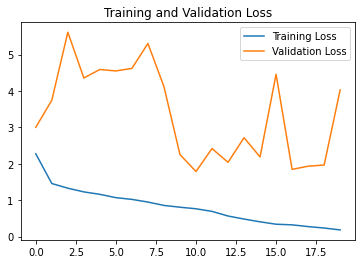

In [103]:

loss_plot(history6)

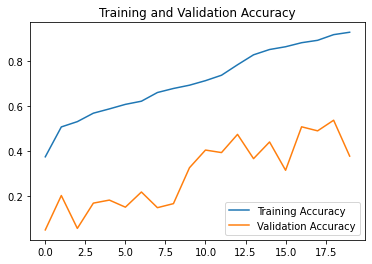

In [104]:
acc_plot(history6)

In [105]:
loss, accuracy = model6.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model6.evaluate(validation_data, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Train Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 57ms/step - loss: 4.0278 - accuracy: 0.3781
Train Accuracy:  0.5122767686843872
Validation Accuracy:  0.37807607650756836
Train Loss:  2.2689602375030518
Validation Loss 4.027827262878418


#### Model 6 doesn't show any improvement in accuracy even after adding bachnormalization to the model

## 

# In comparision with all 6 models model 2 and model 4 performs better
# Model 2

### Train Accuracy:  0.6222098469734192
### Validation Accuracy:  0.5615212321281433
### Train Loss:  0.9948585629463196
### Validation Loss 1.270972967147827

# Model 4

### Train Accuracy:  0.4810267984867096
### Validation Accuracy:  0.45413869619369507
### Train Loss:  1.3681375980377197
### Validation Loss 1.527153730392456